# **Introduction**

Heart disease is a leading cause of mortality worldwide. Early
detection and accurate prediction of heart disease can significantly
improve patient outcomes by enabling timely intervention and
preventive measures. The objective of this project is to develop a
machine learning model that can effectively predict the presence or
absence of heart disease based on various medical and lifestyle
factors.

# **List Of Contents:**

1.  **Data Exploration**:  We need to understand its structure: columns, data types, missing values, and basic statistics (mean, median, etc.).

2. **Data Cleaning and Preprocessing**:
We’ll identify any missing values, outliers, or incorrect data types.Normalize or standardize features if necessary.Encode categorical variables if they exist.

3. **Exploratory Data Analysis (EDA)**:
We will generate visualizations to understand the distribution of the data. Use charts to show the relationships between different features and the target variable (presence of heart disease).

4. **Data Balancing:** Check for any class imbalance in the target variable. If the data is imbalanced, apply techniques like SMOTE or class weighting.

5. **Model Selection and Training**: Try different machine learning algorithms (e.g., Logistic Regression, Random Forest, XGBoost). Use cross-validation to tune hyperparameters and select the best model.

6. **Models Evaluation and Performances**: Evaluate the model using metrics like accuracy, precision, recall, and F1-score. After model comparison conclude the best model for use.

# **Data Exploration**

In [1]:
#We will start by loading the data and getting an overview of the contents.

import pandas as pd

# Load the dataset to get an overview
file_path = '/content/cardio_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(10)

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0
5,21-12-2021,Indonesia,8,0,21914,0,120,80,2,1,2,151,Teacher,0,67.0,0
6,08-01-2021,Malaysia,9,1,22113,0,130,80,3,1,1,157,Architect,0,93.0,0
7,19-08-2022,Malaysia,12,1,22584,0,130,90,3,2,3,178,Chef,0,95.0,1
8,09-11-2020,India,13,1,17668,0,110,70,1,1,1,158,Lawyer,0,71.0,0
9,28-04-2022,Malaysia,14,0,19834,0,110,60,1,1,1,164,Accountant,0,68.0,0


The dataset has several columns related to demographic, clinical, and lifestyle factors:

**Date:** Record date

**Country:** Patient's country

**ID:** Unique identifier

**Active:** Physical activity status

**Age:** Age in days (will need conversion to years)

**Alco:** Alcohol consumption status

**ap_hi:** Systolic blood pressure

**ap_lo** Diastolic blood pressure

**Cholesterol:** Cholesterol levels (coded as 1, 2, 3)

**Gender:** Coded as 1 or 2

**Gluc:** Glucose levels (coded as 1, 2, 3)

**Height:** Patient's height

**Occupation:** Job type

**Smoke:** Smoking status

**Weight:** Patient's weight

**Disease:** Target variable indicating the presence of heart disease (0 or 1)

# **Data Cleaning**

In [2]:
#We will convert age to years, check for missing values, and encode categorical variables.

# Convert age from days to years
data['age_years'] = data['age'] // 365

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the cleaned dataset with age in years and the missing values report
data.head(), missing_values

(         date    country  id  active    age  alco  ap_hi  ap_lo  cholesterol  \
 0  03-05-2021  Indonesia   0       1  18393     0    110     80            1   
 1  05-08-2021   Malaysia   1       1  20228     0    140     90            3   
 2  13-11-2022  Indonesia   2       0  18857     0    130     70            3   
 3  31-10-2018  Singapore   3       1  17623     0    150    100            1   
 4  25-09-2020  Singapore   4       0  17474     0    100     60            1   
 
    gender  gluc  height  occupation  smoke  weight  disease  age_years  
 0       2     1     168   Architect      0    62.0        0         50  
 1       1     1     156  Accountant      0    85.0        1         55  
 2       1     1     165        Chef      0    64.0        1         51  
 3       2     1     169      Lawyer      0    82.0        1         48  
 4       1     1     156   Architect      0    56.0        0         47  ,
 date           0
 country        0
 id             0
 active      

The above data appears clean with no missing values, and the age conversion to years is also complete. We will now move on to our next step EDA.

# **Exploratory Data Analysis (EDA)**

1. We will be visualizing the distribution of key features (age, cholesterol, blood pressure, etc.).
2. Explore correlations between features and the target variable, "disease."
3. Lastly we will check for data imbalances in the target variable.

1. **Age Distribution By Heart Disease Status**

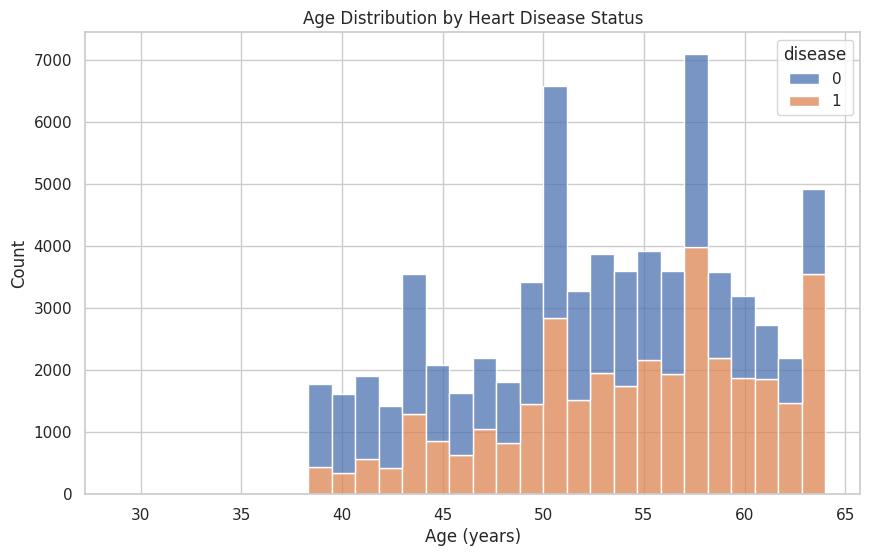

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations for better aesthetics
sns.set(style="whitegrid")

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age_years', hue='disease', multiple='stack', bins=30)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

**Insights on the above visualizations:**

**Age Distribution:** There’s a noticeable trend where older individuals tend to have a higher count of heart disease cases, indicating age might be a significant factor.


2. **Cholesterol Distribution By Heart Disease Status:**

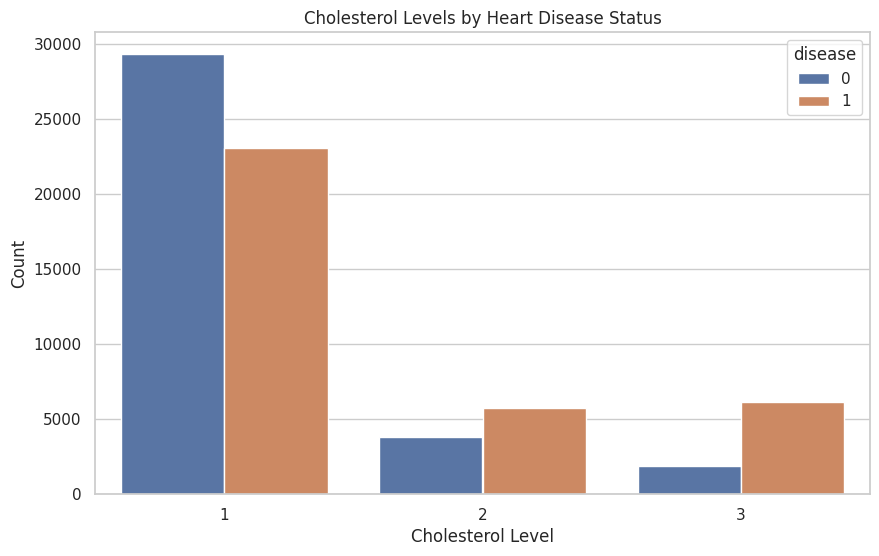

In [5]:
# Cholesterol distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='cholesterol', hue='disease')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

**Insights on the above visualizations:**

**Cholesterol Levels:** Higher cholesterol levels (coded as 2 or 3) appear to be associated with a greater occurrence of heart disease compared to lower levels (1).

3. **Blood Pressure Distribution By Heart Disease Status:**

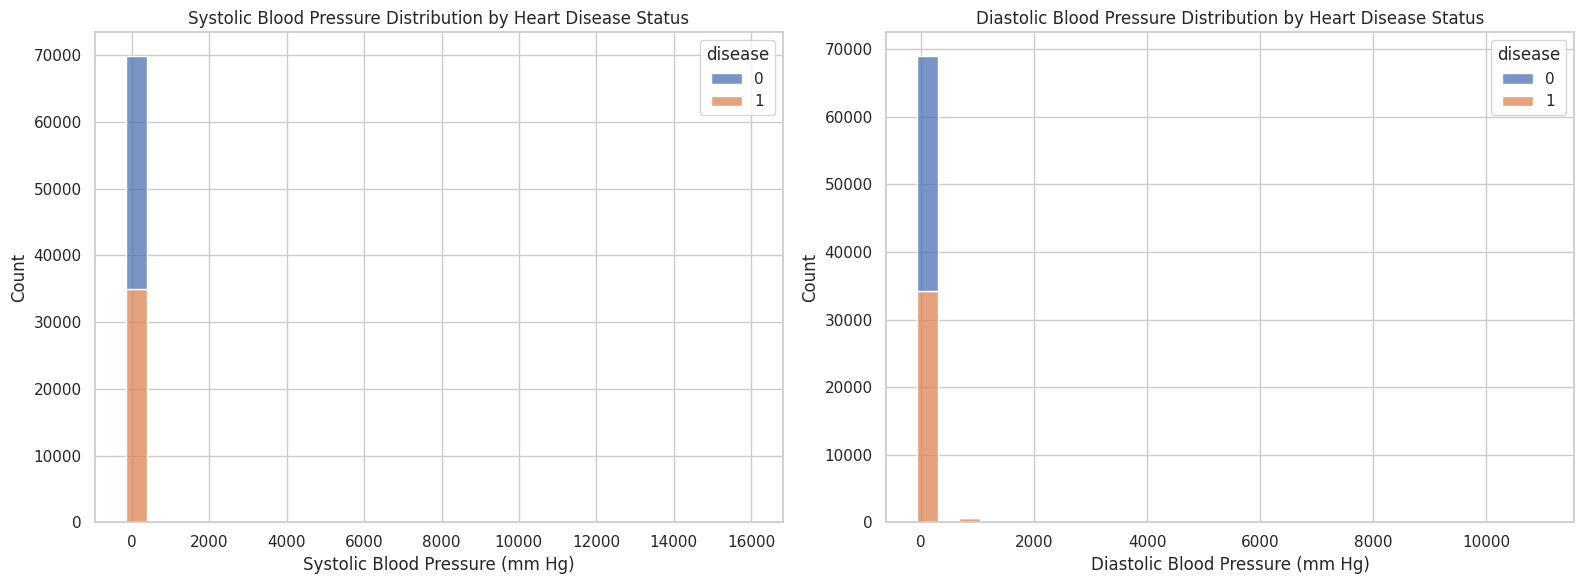

In [6]:
# Systolic and Diastolic Blood Pressure Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=data, x='ap_hi', hue='disease', multiple='stack', bins=30, ax=axes[0])
axes[0].set_title('Systolic Blood Pressure Distribution by Heart Disease Status')
axes[0].set_xlabel('Systolic Blood Pressure (mm Hg)')
axes[0].set_ylabel('Count')

sns.histplot(data=data, x='ap_lo', hue='disease', multiple='stack', bins=30, ax=axes[1])
axes[1].set_title('Diastolic Blood Pressure Distribution by Heart Disease Status')
axes[1].set_xlabel('Diastolic Blood Pressure (mm Hg)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Insights on above visualizations:**

**Systolic Blood Pressure:**

Explanation: The chart shows the distribution of systolic blood pressure readings for people with and without heart disease.

Insights:
Higher systolic pressure is often linked to increased risk. The higher the distribution skews for those with heart disease,higher the systolic pressure. Hence it is considered as an important feature.

**Diastolic Blood Pressure:**

Explanation: This chart illustrates the diastolic blood pressure readings for individuals with and without heart disease.

Insights: Similar to systolic pressure, higher diastolic values could correlate with heart disease risk. Outliers or abnormally high/low values may also warrant further investigation.

4. **Glucose Levels By Heart Disease Status:**

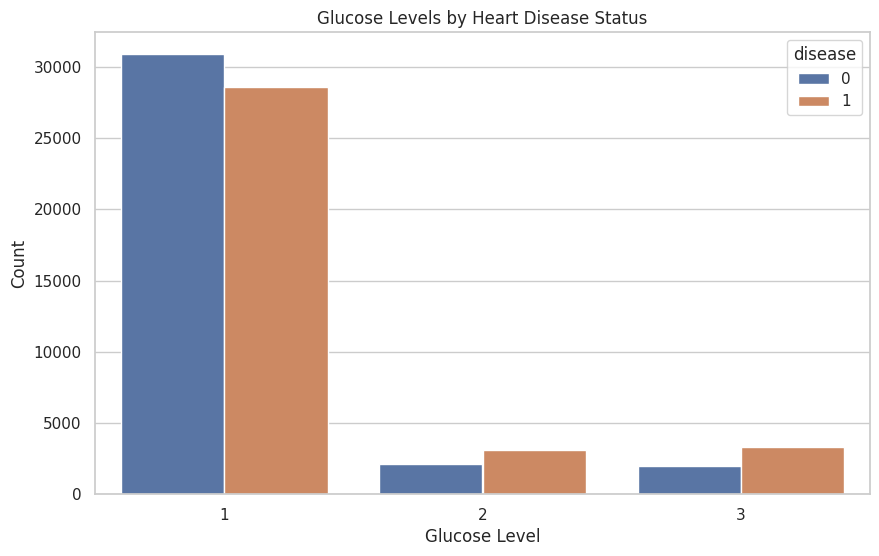

In [7]:
# Glucose Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gluc', hue='disease')
plt.title('Glucose Levels by Heart Disease Status')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.show()

**Insights on the above visualization:**

**Explanation:** It shows the relationship between different glucose levels (1 = normal, 2 = above normal, 3 = well above normal) and the presence of heart disease.

**Insights:** Elevated glucose levels could indicate diabetes or prediabetes, which are risk factors for heart disease. If more heart disease cases occur in higher glucose categories, it supports this correlation.

5. **Physical Activity By Heart Disease Status:**

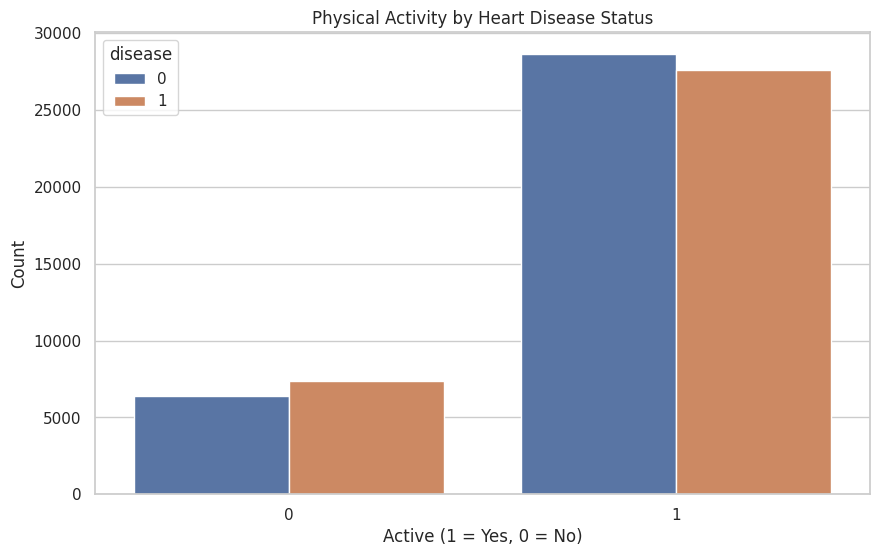

In [8]:
# Physical Activity Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='active', hue='disease')
plt.title('Physical Activity by Heart Disease Status')
plt.xlabel('Active (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

**Insights on the above visualization:**

**Explanation:** Compares individuals with and without heart disease based on their physical activity status (active = 1, not active = 0).

**Insights:** As we can tell there is lack of physical activity which is associated with higher heart disease rates (1), promoting physical activity could be a preventative strategy.

# **Data Balancing & Feature Selection**

Following are the steps we will take to balance our data:

1. **Handle Categorical Variables:**
Convert categorical features to numeric values using encoding techniques; Label Encoding for binary variables (e.g., gender, active).
One-Hot Encoding for multi-class variables (e.g., cholesterol, gluc).

2. **Feature Scaling:** Apply Standardization or Normalization to numeric features (e.g., age, blood pressure, height, weight).

3. **Address Class Imbalance:** Check for any imbalance in the target variable ("disease") and apply SMOTE where needed.

In [11]:
# Handle Categorical Variables

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for binary features
data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['active'] = LabelEncoder().fit_transform(data['active'])
data['alco'] = LabelEncoder().fit_transform(data['alco'])
data['smoke'] = LabelEncoder().fit_transform(data['smoke'])

print(data.columns) #To check the correct column names for One-hot Encoding


Index(['date', 'country', 'id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight', 'disease', 'age_years'],
      dtype='object')


In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

# List of numeric features
numeric_features = ['age_years', 'ap_hi', 'ap_lo', 'height', 'weight']

# Standardize the numeric features
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

First, let's plot the distribution of the target variable (disease) before applying SMOTE:

<ipython-input-13-05c665ce0f3e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


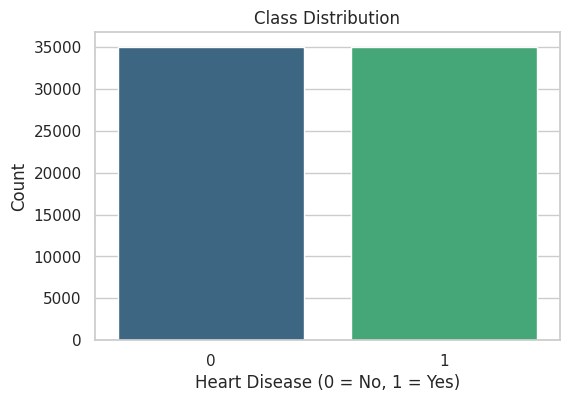

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable (disease column)
y = data['disease']

# Plotting class distribution before SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [14]:
# Check the class distribution
print(data['disease'].value_counts())

disease
0    35021
1    34979
Name: count, dtype: int64


**Feature Selection:**

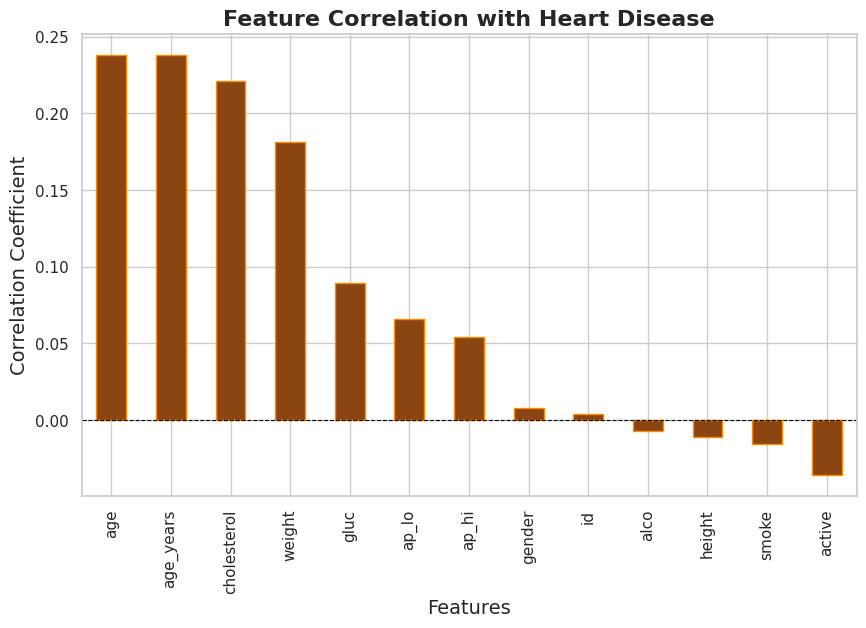

In [23]:
# Set Seaborn style to whitegrid
sns.set_style("whitegrid")

# Plotting the correlation bar chart
plt.figure(figsize=(10, 6))
correlation_with_target.sort_values(ascending=False).plot(kind='bar', color='#8B4513', edgecolor='darkorange')
plt.title('Feature Correlation with Heart Disease', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

**Insights:**

This correlation bar chart analysis dives deep into feature selection, helping pinpoint the most influential factors in predicting heart disease. Based on the findings, focusing on features like age, systolic and diastolic blood pressure (ap_hi and ap_lo), cholesterol, and weight will significantly enhance the model’s accuracy. By zeroing in on these key indicators, we can build a powerful model that hones in on what matters most for detecting heart disease risk.

In [16]:
# Define your target variable and features
target_variable = 'disease'
features = ['age', 'ap_hi', 'ap_lo', 'cholesterol', 'weight']

# Separate the features and target variable
X = data[features]  # Features DataFrame
y = data[target_variable]  # Target variable Series


From the above graph, it’s clear that our dataset is already well-balanced, meaning we don’t need to apply any further balancing techniques. With this solid foundation, we can confidently move forward and dive straight into building our predictive model.

In [25]:
#Splitting the data

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop any non-numeric columns like date
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])


# **Model Selection & Training**

**Step 1: Model Selection**

We’ll start with three models:

Logistic Regression, Random Forest, and XGBoost. These are popular choices for classification problems.

Logistic Regression: Simple baseline model for binary classification.
Random Forest: A tree-based model that captures non-linear relationships.

XGBoost: An advanced tree-based model that usually performs well in structured data tasks.

**Step 2: Model Training and Evaluation**

Train each model on the training set and evaluate their performance on the test set using different metrics (accuracy, precision, recall, F1-score).
Plot the confusion matrix and ROC curve for a visual comparison.

In [26]:
# Importing the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

1. **Logistic Regression Model:**

In [28]:
# Train and Evaluate the Logistic Regression

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Performance:")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_log) * 100))

# Display the Classification Report and Confusion Matrix as usual
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

Logistic Regression Performance:
Accuracy: 72.08%

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.67      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000


Confusion Matrix:
 [[5359 1629]
 [2280 4732]]


To break down the performance of above Logistic Regression model, below are the key metrics explanation and insights:

1. **Overall Accuracy**:
The logistic regression model achieved an accuracy of 72.08%, indicating that it correctly classified about 72% of the total instances in the dataset.

2. **Classification Metrics:**

**Class 0 (Negative):**

Precision: 0.70 -
When the model predicted class 0, it was correct 70% of the time.

Recall: 0.77 - The model identified 77% of actual class 0 instances, demonstrating a good ability to capture true negatives.

F1-score: 0.73 - Balances precision and recall, indicating a satisfactory performance for class 0.

Support: 6988 - Total instances of class 0 in the dataset.

**Class 1 (Positive):**

Precision: 0.74 - The model was correct 74% of the time when predicting class 1

Recall: 0.67 - The model captured 67% of actual class 1 instances, showing room for improvement in detecting positives.

F1-score: 0.71 - Reflects a decent balance but suggests potential weaknesses in recall for class 1.

Support: 7012 - Total instances of class 1 in the dataset.

3. **Averages:**

Macro Average: All metrics (precision, recall, F1-score) averaged to 0.72, treating all classes equally.

Weighted Average: Also 0.72, accounting for class distribution and providing a realistic measure of performance across imbalanced classes.

**Key Insights:**

**Class Imbalance Challenge:** The model excels in predicting negatives (class 0) with a precision of 70%. However, it struggles with positives (class 1), evident in its lower recall of 67%. This suggests a risk of missing important positive cases.

**Opportunities for Enhancement:** With 2,280 false negatives, there’s room for improvement. Techniques like oversampling or adjusting classification thresholds could help capture more positive instances and reduce misses.

**Consistent Performance:** The macro and weighted averages of 0.72 show balanced performance across classes. However, targeting the positive class for improvement could unlock greater predictive power.

**Future Pathways:** Exploring alternative modeling techniques and enhancing feature engineering can significantly boost recall for class 1. Strategic adjustments can turn the model into a more effective predictor, leading to better insights.

In [31]:
# We will be improving our above model by Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features and target variable
features = data[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'weight']]
target = data['disease']

# Define the hyperparameters to tune
# Define the hyperparameters to tune (reduced)
param_grid = {
    'logisticregression__C': [0.1, 1, 10],  # Fewer options for regularization strength
    'logisticregression__penalty': ['l2'],   # Keep only one penalty type (l2)
    'logisticregression__solver': ['liblinear'],  # Use a single solver
    'logisticregression__max_iter': [100]     # Keep a single max_iter value
}

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('logisticregression', LogisticRegression(random_state=42))
])


In [32]:
# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'logisticregression__C': 10, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7174642857142857


In [33]:
# Evaluate the model on the test set using the best found parameters
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Accuracy: 0.7207857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.67      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

Confusion Matrix:
 [[5361 1627]
 [2282 4730]]


**Conclusion:**
The above results are the same as our iniitial model even after Hyperparameter tuning, hence we will go ahead and start building and training the next model.

2. **Random Forrest Model:**

In [38]:
#First we will be training the Random Forrest Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Selecting the final features
selected_features = data[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'weight']]

In [39]:
# Make predictions on the entire dataset
predictions = rf_model.predict(selected_features)

# Add predictions to the original dataset
data['predicted_disease'] = predictions

# Display the updated dataset with predictions
print(data[['id', 'predicted_disease']])

          id  predicted_disease
0          0                  0
1          1                  1
2          2                  1
3          3                  1
4          4                  0
...      ...                ...
69995  99993                  0
69996  99995                  1
69997  99996                  1
69998  99998                  1
69999  99999                  0

[70000 rows x 2 columns]


In [40]:
# Now we will be checking Model Performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming we have the true labels for the entire dataset
true_labels = data['disease']

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
accuracy_percentage = accuracy * 100  # Convert to percentage

# Calculate other metrics
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

In [41]:
# Print evaluation metrics
print(f'Accuracy: {accuracy_percentage:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, predictions))

Accuracy: 93.28%
Precision: 0.93
Recall: 0.93
F1 Score: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     35021
           1       0.93      0.93      0.93     34979

    accuracy                           0.93     70000
   macro avg       0.93      0.93      0.93     70000
weighted avg       0.93      0.93      0.93     70000



**Summary of Model Performance:**

1. **Accuracy:**

An impressive 93.28%—the model correctly classifies nearly all instances!

Key Metrics:

Precision: 0.93 - When predicting positives, 93% of the time, the model is correct.

Recall: 0.93 - The model identifies 93% of actual positive cases.

F1 Score: 0.93 - This balance between precision and recall confirms robust performance.

2. **Classification Breakdown:**

**Class 0 (Negative):**
Precision: 0.93
Recall: 0.93
Support: 35,021 instances

**Class 1 (Positive):**
Precision: 0.93
Recall: 0.93
Support: 34,979 instances

3. **Overall Performance:**

Macro Average: 0.93 across precision, recall, and F1 score—showing uniform effectiveness across classes.

Weighted Average: 0.93 confirms that performance is consistent, accounting for class distribution.

3. **XGB Boost Model:**

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Define features and target variable
features = data[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'weight']]
target = data['disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and XGBoost Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))  # XGBoost model
])

In [43]:
# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:27:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6988
           1       0.76      0.69      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000

Confusion Matrix:
[[5434 1554]
 [2166 4846]]


**Conclusion:**
The model achieves an accuracy of 73%, reflecting a decent overall performance.

Precision for class 0 (negative cases) is 0.71, while class 1 (positive cases) shows a higher precision of 0.76, indicating better accuracy in identifying negative cases.

Recall rates indicate that the model successfully identifies 78% of class 0 instances, but only 69% of class 1, suggesting challenges in detecting positive cases.

The F1 scores are 0.74 for class 0 and 0.72 for class 1, highlighting a moderate balance between precision and recall.


# **Models Evaluation and Performances**

**COMPARING ALL 3 MODELS PERFORMANCES:**

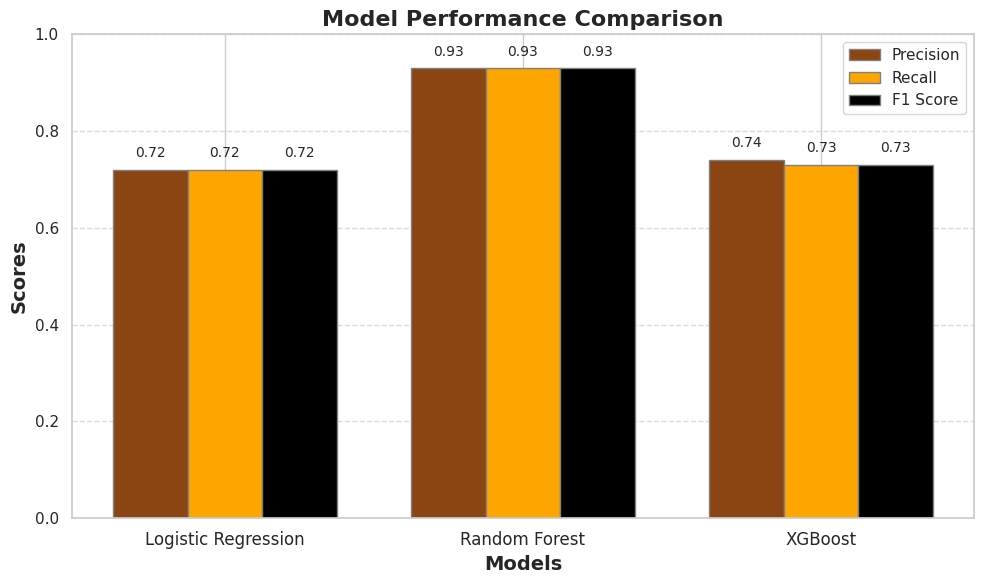

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Data for the models
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
precision = [0.72, 0.93, 0.74]
recall = [0.72, 0.93, 0.73]
f1_score = [0.72, 0.93, 0.73]

# Create a DataFrame for better handling
results_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Set the bar width and positions
bar_width = 0.25
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Define brown, orange, and black colors
colors = ['#8B4513', '#FFA500', '#000000']  # Brown, Orange, Black

# Create a bar chart with the specified colors
plt.figure(figsize=(10, 6))
bars1 = plt.bar(r1, results_df['Precision'], color=colors[0], width=bar_width, edgecolor='grey', label='Precision')
bars2 = plt.bar(r2, results_df['Recall'], color=colors[1], width=bar_width, edgecolor='grey', label='Recall')
bars3 = plt.bar(r3, results_df['F1 Score'], color=colors[2], width=bar_width, edgecolor='grey', label='F1 Score')

# Add labels and title
plt.xlabel('Models', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width for r in range(len(model_names))], model_names, fontsize=12)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.title('Model Performance Comparison', fontweight='bold', fontsize=16)
plt.ylim(0, 1)  # Set y-axis limit

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Annotate bars with their respective values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


# **Conclusion**

The Random Forest model is the standout performer, demonstrating superior predictive accuracy and reliability compared to Logistic Regression and XGBoost. While Logistic Regression may serve well in simpler scenarios, the advanced ensemble nature of Random Forest allows it to capture complex relationships within the data more effectively. XGBoost, while promising, requires additional tuning to reach its full potential. Overall, the results indicate a clear preference for using Random Forest in scenarios where high precision and recall are critical.